Using default location ~/mne_data for sample...
Creating /Users/nazaninean/mne_data


  0%|                                              | 0.00/1.65G [00:00<?, ?B/s]

Untarring contents of '/Users/nazaninean/mne_data/MNE-sample-data-processed.tar.gz' to '/Users/nazaninean/mne_data'


Attempting to create new mne-python configuration file:
/Users/nazaninean/.mne/mne-python.json
Could not read the /Users/nazaninean/.mne/mne-python.json json file during the writing. Assuming it is empty. Got: Expecting value: line 1 column 1 (char 0)
Download complete in 02m24s (1576.2 MB)
Opening raw data file /Users/nazaninean/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Using matplotlib as 2D backend.


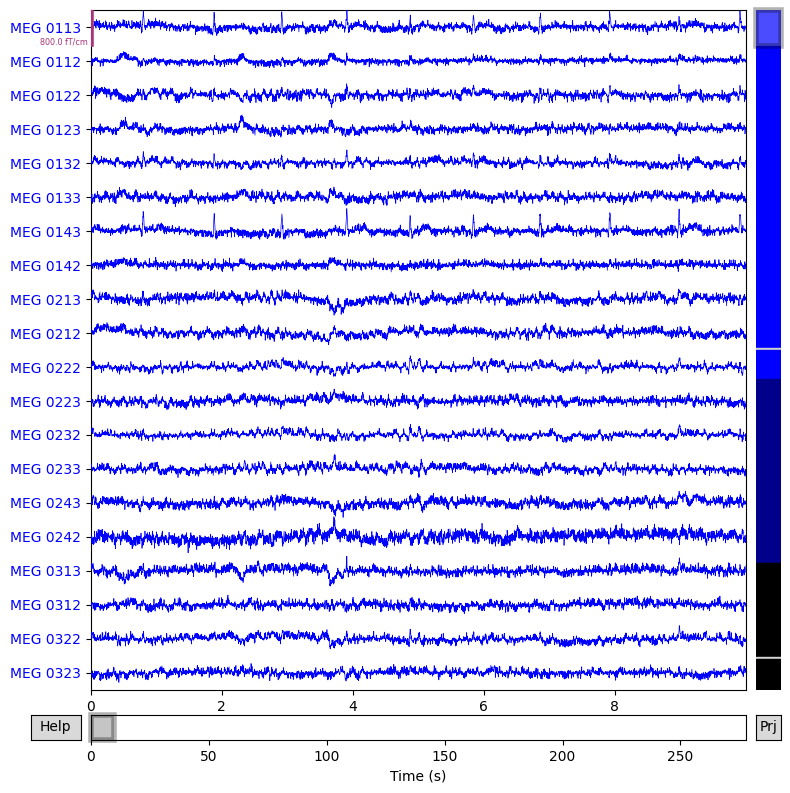

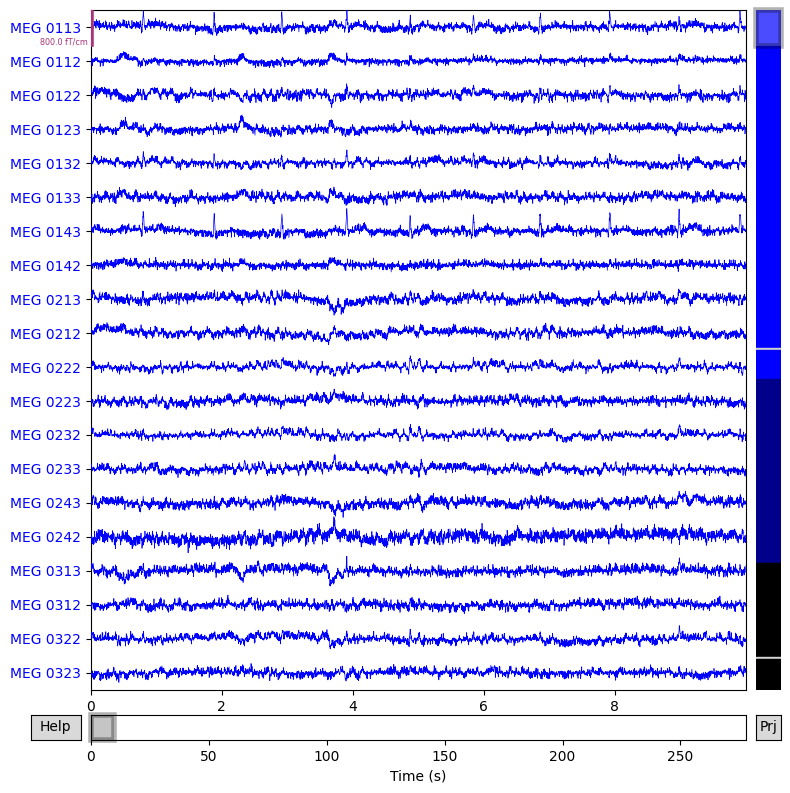

In [1]:
import mne

# Load a sample EEG dataset that comes built into MNE
sample = mne.datasets.sample.data_path()
raw = mne.io.read_raw_fif(sample / 'MEG' / 'sample' / 'sample_audvis_raw.fif', preload=True)

# Plot the raw signal
raw.plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1983 samples (3.302 s)



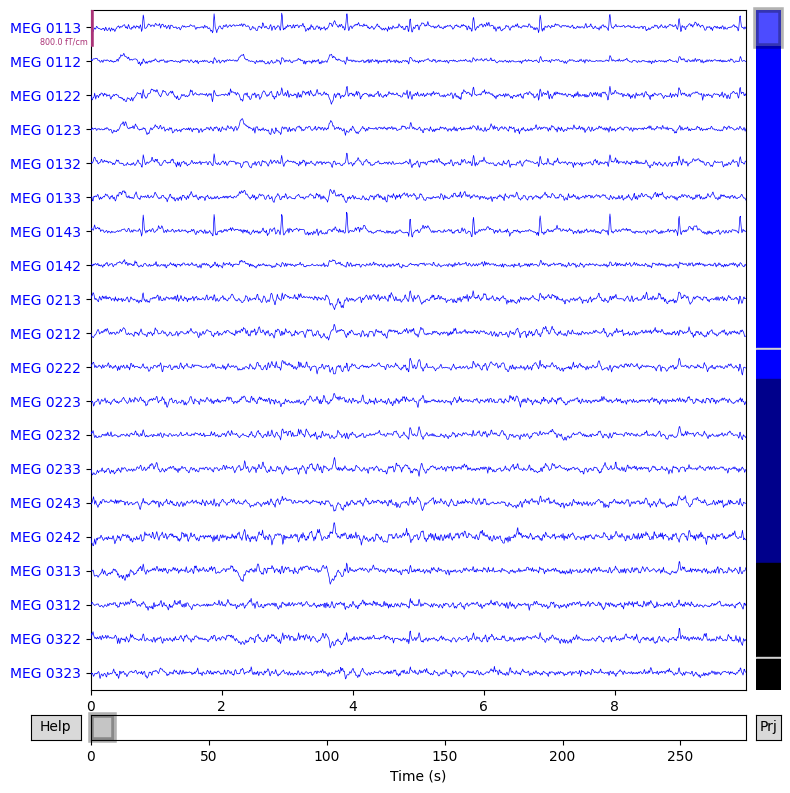

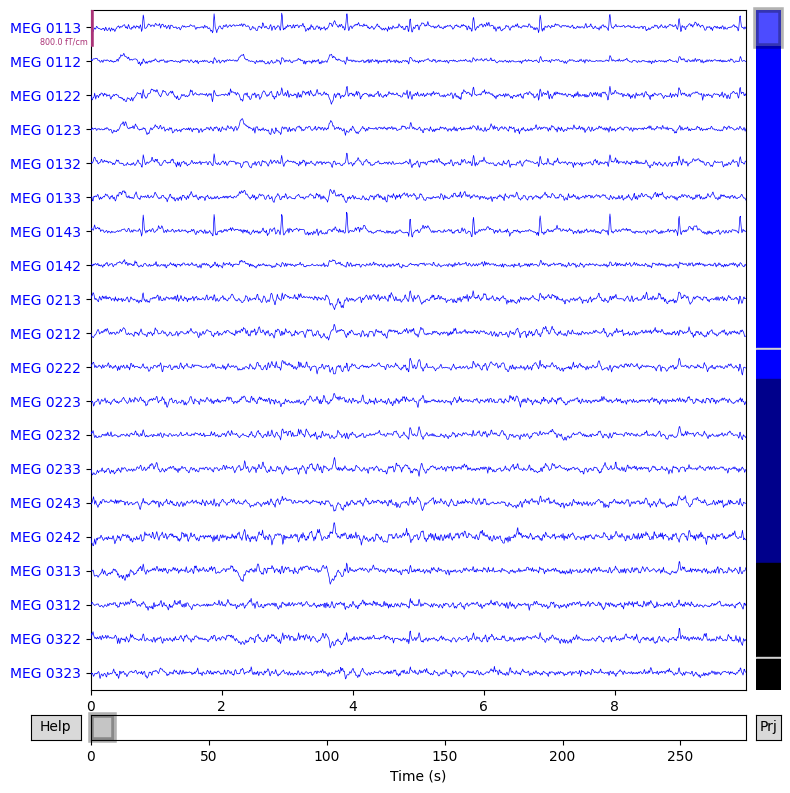

In [2]:
raw.filter(1, 40)
raw.plot()

In [3]:
events, event_id = mne.events_from_annotations(raw)
print(event_id)

{}


In [4]:
events = mne.find_events(raw)
print(events[:10])

Finding events on: STI 014
320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
[[27977     0     2]
 [28345     0     3]
 [28771     0     1]
 [29219     0     4]
 [29652     0     2]
 [30025     0     3]
 [30450     0     1]
 [30839     0     4]
 [31240     0     2]
 [31665     0     3]]


Not setting metadata
289 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 289 events and 421 original time points ...
0 bad epochs dropped
<Epochs | 289 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~352.2 MiB, data loaded,
 '1': 72
 '2': 73
 '3': 73
 '4': 71>
Not setting metadata
289 matching events found
No baseline correction applied
0 projection items activated


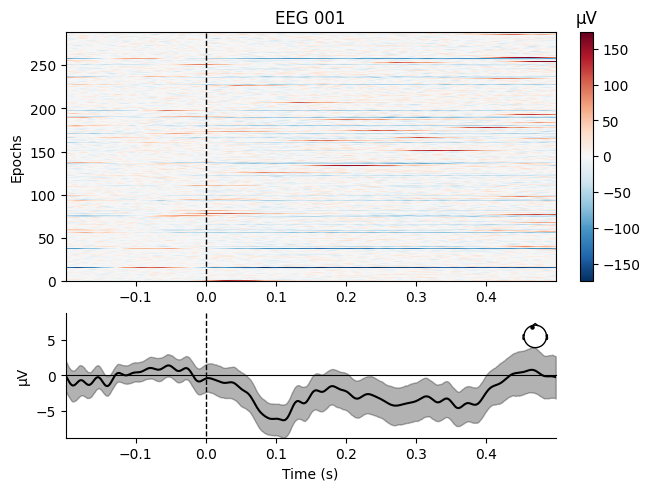

[<Figure size 640x480 with 4 Axes>]

In [5]:
epochs = mne.Epochs(raw, events, event_id=[1, 2, 3, 4], 
                    tmin=-0.2, tmax=0.5, preload=True)
print(epochs)
epochs.plot_image(picks='EEG 001')